## 交叉验证

**我们用train and test 来划分测试集的方式比较单一，当划分的集合不同，精度也会不同，所以我们可以求平均数来更有说服力**

In [3]:
from sklearn.cross_validation import KFold

kf = KFold(25,n_folds=5,shuffle=False)

print('{} {:61} {}'.format('迭代次数','训练数据','测试数据'))
for it,data in enumerate(kf,start=1):
    print('{:^9} {} {:^25}'.format(it,str(data[0]),str(data[1])))

迭代次数 训练数据                                                          测试数据
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


# 1.使用交叉验证调参

## sklearn里的Cross Validation

sklearn早就做好了这一封装

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy') # cv表示使用10次交叉
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [6]:
# 求均值
print(scores.mean())

0.966666666667


## 重新调参

In [8]:
k_ranges = range(1,31)
k_scores = []

for k in k_ranges:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy') # cv表示使用10次交叉
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


**使用图形展示**

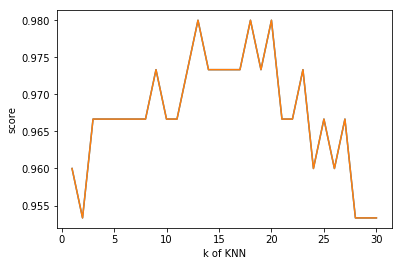

In [10]:
import matplotlib.pyplot as plt

plt.plot(k_ranges,k_scores)
plt.xlabel('k of KNN')
plt.ylabel('score')
plt.show()

# 2.使用交叉验证选择模型

In [11]:
knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy') 
print(scores.mean())

0.98


In [12]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
scores = cross_val_score(log,X,y,cv=10,scoring='accuracy') 
print(scores.mean())

0.953333333333


说明KNN要比Logistic好

# 3.使用交叉验证选择属性

上面都是选择问题，下面以之前的广告回归问题为例说明选择参数

In [13]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [14]:
# 准备数据
feture_cols = ['TV','radio','newspaper']

X = data[feture_cols]
y = data.sales

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [19]:
# 由于我们需要分数是正的，并且越小越好
mse_score = -scores
# 求标准差
import numpy as np
rmse_score = np.sqrt(mse_score)
print(rmse_score.mean())

1.69135317081


**现在我们去掉报纸这个属性**

In [20]:
feture_cols = ['TV','radio']

X = data[feture_cols]

print(np.sqrt(-cross_val_score(lr,X,y,cv=10,scoring='neg_mean_squared_error')).mean())

1.67967484191


要小一些，说明不要报纸更好